# Broadcast 性能报告图表

要求如下：
- 性能图：体现不同parameter配置下的运行时间【横坐标：parameter（10个），纵坐标：时间】
- 不同flops下的性能图【计算密集型算子】【横坐标：flops section（去除小数点），纵坐标：count】
- 不同型号GPU上的性能对比

读入数据，我们起码需要time and flops

In [1]:
import pandas as pd

op = 'zero_'
data = pd.read_csv(f"{op}_top10_flops.csv")

def para_flops():
    '''
    我们应该将哪些数据分类呢？出现次数最多的。
    '''
    g = data.groupby(by='parameters')
    labels = g.size().reset_index(name='count')\
        .sort_values(by=['count'],ascending=(False)).head(10)
    return labels.join(data.groupby(by='parameters').agg({'Mflops': 'mean', 'running_time': 'mean'}), on='parameters')

res = para_flops()
print(res)

                             parameters  count        Mflops  running_time
49              {'input_size': [[256]]}     28     29.853102      0.000009
17              {'input_size': [[128]]}     25     14.441063      0.000012
73              {'input_size': [[512]]}     24     57.778394      0.000009
46   {'input_size': [[256, 256, 3, 3]]}     22  65619.657394      0.000009
83               {'input_size': [[64]]}     21      7.391693      0.000009
5              {'input_size': [[1024]]}     16    114.613975      0.000010
33             {'input_size': [[2048]]}     16    233.747961      0.000009
2   {'input_size': [[1024, 256, 1, 1]]}     15  28767.684826      0.000010
12   {'input_size': [[128, 128, 3, 3]]}     12  17011.016362      0.000009
42  {'input_size': [[256, 1024, 1, 1]]}     11  29057.674114      0.000010


## 性能图(parameter - FLOPs) broken

49       29.853102
17       14.441063
73       57.778394
46    65619.657394
83        7.391693
5       114.613975
33      233.747961
2     28767.684826
12    17011.016362
42    29057.674114
Name: Mflops, dtype: float64


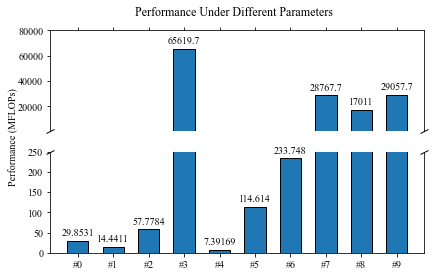

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

'''
data config
'''
flops = para_flops()['Mflops']
print(flops)
labels = [f'#{i}' for i in range(len(flops))]
'''
data config end
'''

# most data at A
A = (0, 250)
# outlines
B = (1000, 80500)

barlabel = True

plt.rcParams['font.sans-serif'] = ['Times New Roman']
matplotlib.rcParams['font.sans-serif'] = ['Times New Roman']
matplotlib.rcParams['axes.unicode_minus'] = False
params = {'font.family':'serif',
    'font.serif': 'Times New Roman',
   # 'font.style': 'italic',
    'font.weight': 'normal',  # or 'blod'
   # 'font.size': '12',  # or large,small
}
plt.rcParams.update(params)

x = np.arange(len(flops))
width = 0.6

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

rects1 = ax1.bar(x, flops, width, label='V100', edgecolor='black')
rects2 = ax2.bar(x, flops, width, label='V100', edgecolor='black')

ax1.set_ylim(*B)  # outliers only
ax2.set_ylim(*A)  # most of the data

# hide the spines between ax and ax2
ax1.spines.bottom.set_visible(False)
ax2.spines.top.set_visible(False)
ax1.xaxis.tick_top()
ax1.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

fig.text(0, 0.5, 'Performance (MFLOPs)', va='center', rotation='vertical')
plt.suptitle('Performance Under Different Parameters', x=0.525, y=.95, horizontalalignment='center')
ax1.set_xticks(x, labels)

if barlabel:
    ax1.bar_label(rects1, padding=3)
    ax2.bar_label(rects2, padding=3)

d = 0.5  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=8,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)

fig.tight_layout()

plt.show()

## 性能图（parameter-time）not broken

config we use: 49                {'input_size': [[256]]}
17                {'input_size': [[128]]}
73                {'input_size': [[512]]}
46     {'input_size': [[256, 256, 3, 3]]}
83                 {'input_size': [[64]]}
5                {'input_size': [[1024]]}
33               {'input_size': [[2048]]}
2     {'input_size': [[1024, 256, 1, 1]]}
12     {'input_size': [[128, 128, 3, 3]]}
42    {'input_size': [[256, 1024, 1, 1]]}
Name: parameters, dtype: object


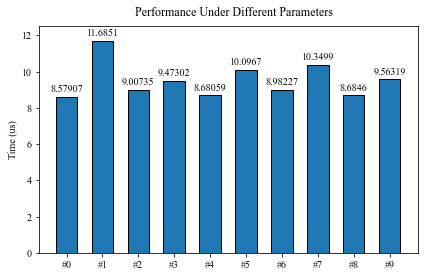

In [7]:
import matplotlib.pyplot as plt
import numpy as np


'''
data config
'''
time = para_flops()['running_time'] * 1000 * 1000
labels = [f'#{i}' for i in range(len(time))]
print('config we use:\n', para_flops()['parameters'])
'''
data config end
'''

x = np.arange(len(labels))  # the label locations
width = 0.6  # the width of the bars

fig, ax = plt.subplots()
rects = ax.bar(x, time, width, label='V100', edgecolor='black')
ax.set_ylim(0, 12.5)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Time (us)')
plt.suptitle('Performance Under Different Parameters', x=0.55, y=.95, horizontalalignment='center')
ax.set_xticks(x, labels, text='%.2f')

ax.bar_label(rects, padding=3)

fig.tight_layout()

plt.show()

## 性能图（section-count）

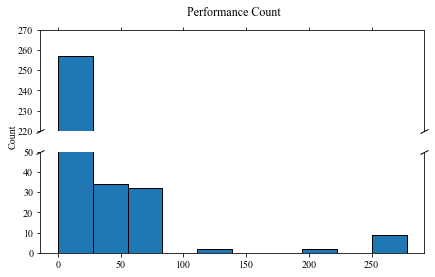

In [4]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

'''
data config
'''
flops = data['Mflops'] / 1000 # GFLOPs
'''
data config end
'''

# most data at A
A = (0, 50)
# outlines
B = (220, 270)

barlabel = True

plt.rcParams['font.sans-serif'] = ['Times New Roman']
matplotlib.rcParams['font.sans-serif'] = ['Times New Roman']
matplotlib.rcParams['axes.unicode_minus'] = False
params = {'font.family':'serif',
    'font.serif': 'Times New Roman',
   # 'font.style': 'italic',
    'font.weight': 'normal',  # or 'blod'
   # 'font.size': '12',  # or large,small
}
plt.rcParams.update(params)

x = np.arange(len(flops))
width = 0.6

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

rects1 = ax1.hist(flops, edgecolor='black')
rects2 = ax2.hist(flops, edgecolor='black')

ax1.set_ylim(*B)  # outliers only
ax2.set_ylim(*A)  # most of the data

# hide the spines between ax and ax2
ax1.spines.bottom.set_visible(False)
ax2.spines.top.set_visible(False)
ax1.xaxis.tick_top()
ax1.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

fig.text(0, 0.5, 'Count', va='center', rotation='vertical')
plt.suptitle('Performance Count', x=0.525, y=.95, horizontalalignment='center')
# ax1.set_xticks(x, labels)

d = 0.5  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=8,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)

fig.tight_layout()

plt.show()

## 对比图（parameter-time）

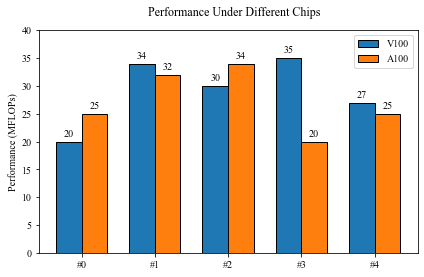

In [6]:
import matplotlib.pyplot as plt
import numpy as np

labels = [f'#{i}' for i in range(5)]
data_v100 = [20, 34, 30, 35, 27]
data_a100 = [25, 32, 34, 20, 25]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, data_v100, width, label='V100', edgecolor='black')
rects2 = ax.bar(x + width/2, data_a100, width, label='A100', edgecolor='black')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Performance (MFLOPs)')
plt.suptitle('Performance Under Different Chips', x=0.55, y=.95, horizontalalignment='center')
ax.set_xticks(x, labels)
ax.set_ylim(0, 40)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
fig.tight_layout()

plt.show()

## 利用率线图（section-rate）